# Day16 Numerical Data 2/2 reduce skewness 
# 數值型特徵 2/2 去除偏態
在Day14的文章中我們討論到判讀資料的偏態，當資料中離群資料比例很高，或平均值沒有代表性時，便可考慮使用以下面幾種方式去除偏態：
1. 對數去偏 - 使用自然對數去除偏態，先加1再取對數，還原時先取指數後再減1。對於可能出現等於零的資料使用。
2. 方跟去偏 - 將資料減去最小值後開根號，最大值有限時適用。例如成績轉換。
3. 分布去偏 - lmbda參數需介於0至0.5之間，注意轉換前資料不可小於等於0。(lmbda參數為0時等於log函數，為0.5時等於開根號)
去除偏態目的在於讓資料更接近常態分布，左右對稱、平均值更具有代表性。

In the Day14 article we talked about skewness. When the ratio of outlier is high or the mean cannot represent the data well, we could use the following methods to reduce skewness. 
1. .log1p() - plus 1 and get log, then get exp and minus 1. Used when 0 might occure in the data.
2. .sqrt() - minus the smallest value and get root. Used when there's a maximum in the data, such as transforming score.
3. .boxcox() - lmbda should be between 0 and 0.5, and no data equals to 0 before transforming. lmbda=0 equals to .log1p() and lmbda=0.5 equals to .sqrt().
The purpose of reducing skewness is to make the data more normally distributed.

以Kaggle競賽[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)作為使用的資料集演示。<br>
We will use the data downloaded from [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) for the example.

In [1]:
import pandas as pd
import numpy as np
import copy

df = pd.read_csv('data/train.csv') # 讀取檔案 read in the file
df.head() # 顯示前五筆資料 show the first five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 只取int64, float64兩種數值型欄位存到 num_features中 
# save the columns that only contains int64, float64 datatypes into num_features
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 去掉文字型欄位，只留數值型欄位 only keep the numeric columns
df = df[num_features]
df = df.fillna(0)
df.head()

7 Numeric Features : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


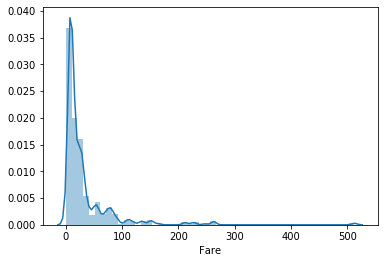

In [4]:
# 顯示Fare的分布圖 plot out the distribution of Fare
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Fare'])
plt.show()

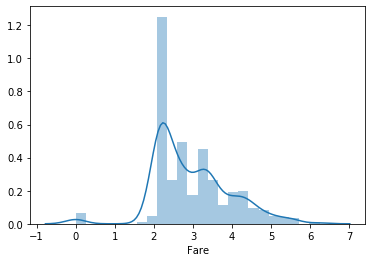

In [5]:
# 將Fare取log1p，看分佈圖 plot out Fare after log1p
df_fixed = copy.deepcopy(df)

df_fixed['Fare'] = np.log1p(df_fixed['Fare'])
sns.distplot(df_fixed['Fare'])
plt.show()

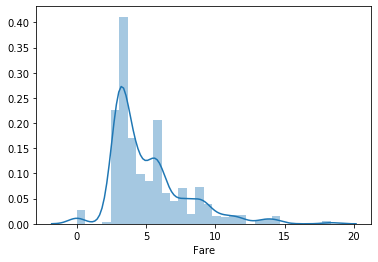

In [6]:
# 取boxcox後看分佈圖 plot out Fare after boxcox
from scipy import stats
df_fixed = copy.deepcopy(df)

df_fixed['Fare'] = df_fixed['Fare'] +1 # 最小值接近-1，先加1做平移 minimum close to -1, add 1 first
df_fixed['Fare'] = stats.boxcox(df_fixed['Fare'], lmbda=0.3)

sns.distplot(df_fixed['Fare'])
plt.show()

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] 第二屆機器學習百日馬拉松內容

[2] [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)